# Termodinâmica de uma usina elétrica a vapor (_power plant_)

<hr>

## Apresentação do projeto:

Esta atividade do curso de Termodinâmica Avançada pretende definir o funcionamento e componentes necessários em um sistema complexo que consiste em uma usina elétrica a vapor -  a qual opera com a combustão de uma mistura de combustíveis em estado líquido.

Na figura abaixo se encontra um diagrama representativo de cada etapa no sistema:

<image src="Apresentação_projeto.png">

Para um melhor entendimento do projeto em questão, é relevante primeiro uma breve explicação de conceitos básicos necessários para compreender a motivação por trás de cada parâmetro envolvido nesse sistema.

### O que é "_entalpia_"?:

A variação da entalpia desempenha um papel central dentro do tema da termoquímica, e depende apenas da energia final, pressão e volume - e não do desenvolvimento que levou o sistema ao seu estado final.
 
Podendo ser definida como uma propriedade semelhante à energia do sistema termodinâmico, a entalpia possui as mesmas dimensões e unidades de medida da mesmo. Seu valor é determinado por temperatura, pressão e composição, sendo compreendido na soma da energia interna e do produto da pressão e volume do sistema.

### Como isso se aplica no nosso projeto:

Se aproximando do nosso problema, a medida que foi levada em conta para a escolha da mistura de combustíveis citada mais acima foi a chamada _entalpia de combustão_, representada por $\Delta H\degree$.

A entalpia de combustão de uma determinada substância consiste na variação de entalpia ocorrida com a queima de 1 mol dessa mesma em condições normais de temperatura e pressão do estado.

<hr>

## A escolha da mistura de combustíveis (Desafio 1):

Observando a imagem de apresentação do sistema, vê-se que a etapa na qual realmente se faz o uso da mistura de combustíveis para a transferência de energia na usina é a denominada "Desafio 3", na qual ocorre a sua combustão. Dada essa função dos combustíveis dentro do sistema da usina, o critério mais relevante para a mistura líquida é, naturalmente, a entalpia de combustão.

Para que os componentes da mistura binária a ser determinada sejam os mais proveitosos, sua variação na entalpia de combustão deve ser a mais alta possível. Por tal motivo, esse foi o critério principal utilizado no processo de escolha dos combustíveis L1 e L2.

### Quais foram os combustíveis selecionados?

Levando em conta as considerações acima, a mistura selecionada para o nosso sistema termodinâmico foi de Benzeno e Metanol. Abaixo consta seus respectivos valores de entalpia de combustão:

    Benzeno: -3267 kJ/mol

    Metanol: -725 kJ/mol

Além da entalpia de combustão, outro fator interessante referente à mistura escolhida é sua azeotropia; fator esse que pode ser bastante pertinente em um processo de usina industrial por facilitar a sua separação.

### Diagrama de fase da mistura binária:

Um diagrama de fase para misturas binárias representa a fase da mistura em função da temperatura (eixo y) e  da variação da concentração de cada composto (eixo x).

Abaixo, vê-se o diagrama de fase para a mistura binária determinada Metanol + Benzeno:

<image src="Diagrama-de-fase.png">

No diagrama de fase referente à mistura escolhida, encontra-se alguns detalhes de grande importância para o processo termodinâmico necessários para o funcionamento das próximas etapas.

Na coordenada aproximada [T(K) : 332 , Methanol : 0,6 mol], percebe-se um ponto máximo do decaimento da temperatura que logo volta a aumentar. É justamente neste ponto máximo que encontramos uma característica benéfica para a separação das misturas; o ponto é chamado de azeotropo (que significa "ferver sem alterar"). Sua presença significa que, quando a mistura líquida é vaporizada, a mesma composição entre os dois estados pode ser encontrada nessa região. Desse modo, existe um ponto de ebulição fixo, como se a substância fosse pura. Desta maneira, uma destilação simples nem sempre é capaz de separar os compostos.

<hr>

## A separação da mistura e sua evaporação (Desafio 2):

Observando novamente o esquema da usina elétrica a vapor, temos que o segundo desafio consiste na separação da mistura binária definida anteriormente, e então sua evaporação. Esse passo é essencial para definir a quantidade e proporção de cada combustível utilizadas nas próximas etapas.

As informações a serem consideradas durante esta etapa seguem abaixo:

* i. O volume final da mistura calculado a partir dos volumes parciais molares;

* ii. O comportamento da mistura de líquido (ideal ou não ideal);

* iii. As características do diagrama de fases da mistura líquida;

* iv. A pressão de vapor dos compostos.

Para determinar todas essas condições iniciais, definimos os parâmetros termodinâmicos envolvidos na combustão:

### **i. Volumes molares e final**

Os valores dos volumes tanto molares de cada combustível quanto total da mistura são representados no seguinte cálculo:

$$v_m = \bar v_1 x_1 + \bar v_2 (1-x_1)$$

, onde $v_m$ representa o volume molar da mistura; $\bar v_1$ e $\bar v_2$ os volumes parciais molares respectivos de cada composto; e $x_1$ é a fração molar - ou proporção do composto 1 em relação ao total da mistura, equivalente a $\frac{n_1}{n_1+n_2}$.

Para realizar o cálculo volumétrico, portanto, precisa-se definir as frações molares $x_1$ e $x_2$ (considerando que essa segunda é igual a $1-x_1$). Essa proporção é dada durante a separação da mistura, e, no caso dos combustíveis escolhidos, terminará por ser igual ao ponto azeotrópico. A seguir, consta o gráfico representativo da separação da mistura, tomando como ponto inicial uma medida de 20% Metanol e 80% Benzeno:

<h6 allign = 'justify', style = 'color: red;'> OBS: A problemática da atividade foi bem apresentada, e os cálculos volumétricos foram explicados com clareza 

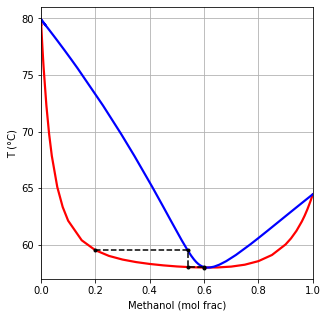

In [7]:
# Importações:
import pandas as pd
import matplotlib.pyplot as plt

# Funções:
def maisPróximo(ponto, lista):
    closest = (min(lista, key = lambda x: abs(x-ponto)))

    return closest

def projeção(ponto, deOnde, praOnde):
    closest = maisPróximo(ponto, deOnde)
    projeção = praOnde[deOnde.index(closest)]

    return projeção

def plotaSeparação(pontoInicial, azeótropoX):
    # Dados:
    df = pd.read_csv('phase_diagram.txt', header=2)
    df.columns = ['Temperature (°C)','x1 (mol fract)','x2 (mol fract)']

    T = df['Temperature (°C)'].to_list()
    x1 = df['x1 (mol fract)'].to_list()
    x2 = df['x2 (mol fract)'].to_list()

    # Configurações de plotagem:
    ig, ax = plt.subplots(figsize=(5,5))
    ax.set_xlim(0,1)
    ax.set_ylim(57,81)
    ax.set_box_aspect(1)
    plt.xlabel("Methanol (mol frac)")
    plt.ylabel("T (°C)")
    plt.grid()

    # Plotagem dos pontos:
    pX = [pontoInicial]
    pY = [projeção(pontoInicial, x1, T)]

    while abs(pX[-1] - azeótropoX)>=0.01:
        pX.append(projeção(pY[-1], T, x2))
        pY.append(pY[-1])
        pX.append(pX[-1])
        pY.append(projeção(pX[-1], x1, T))

    ax.plot(x1,T,'r', linewidth=2.2)
    ax.plot(x2,T,'b', linewidth=2.2)
    ax.plot(pX, pY, linestyle='dashed', marker='.', color='k')

    plt.show()

# Script:
plotaSeparação(0.2, 0.61)

Como mencionado, foi escolhido como ponto inicial a proporção de 20% Metanol e 80% Benzeno. Essa escolha foi realizada com base nos valores de entalpia de combustão de cada combustível; por possuir uma energia maior, o Benzeno foi escolhido em maior quantidade.

Com os valores de $x_1$ e $x_2$ definidos pelo ponto azeotrópico, que se encontra mais precisamente na temperatura de 58°C e nas frações molares $x_{Metanol} = 0.614$ e $x_{Benzeno} = 0.386$, ainda são necessários os valores de volume parcial molar $\bar v_1$ e $\bar v_2$ para realizar o cálculo do volume molar da mistura $v_m$.

Esses volumes parciais molares podem ser expressos em função da densidade da mistura, de maneira que, para encontrá-los, basta resolver:

$$\bar v_1 = \frac{\text{m.w.}_1}{\rho_{mistura}} \qquad \text{e} \qquad \bar v_2 = \frac{\text{m.w.}_2}{\rho_{mistura}}$$

, onde $\rho_{mistura}$ representa a densidade da mistura; e $\text{m.w.}_1$ e $\text{m.w.}_2$ são as massas molares dos compostos 1 e 2.

Substituindo os valores conhecidos de massa molar $\text{m.w.}_{Metanol} = 32.04$ e $\text{m.w.}_{Benzeno} = 78.11$, assim como de densidade $\rho_{mistura} = (0.614 \times 0.79) + (0.386 \times 0.88) \approx 0.825 \, g/cm^3$, temos:

$$\bar v_1 = \frac{32.04}{0.825} \approx 38.836 \qquad \text{e} \qquad \bar v_2 = \frac{78.11}{0.825} \approx 94.679$$

, e, finalmente:

$$v_m = \bar v_1 x_1 + \bar v_2 (1-x_1) = (38.836 \times 0.614)+(94.679 \times 0.386) \approx 60.391 $$

<h5 allign = "justify", style = "color: red;"> OBS: A explicação do cálculo dos volumes parciais molares e volume da mistura foi objetiva, mas faltou uma motivação, como uma justificativa do porquê calcular o volume da mistura. Acreditamos que um ponto de importância relevante não foi passado: A informação de que trabalhamos com 1 Tonelada de compostos, além da grandeza do cálculo do volume da mistura não ter sido informado.

### **ii. Idealidade da mistura**

No banco de dados consultado, foi encontrado um diagrama de pressão para a mistura a ser tratada (que pode ser encontrado abaixo) - no entanto, esse diagrama visivelmente não está completo:
    
<image src="Diagrama-de-pressão.png">

Em vista desse problema, optou-se por considerar a mistura de líquidos ideal. Tendo definida a idealidade da mistura, pode-se então utilizar da lei de Raoult para inferir a pressão de vapor total da mistura a partir da pressão de cada composto. O cálculo desse processo para a nossa mistura será realizado mais abaixo, na definição da sua pressão de vapor.
    
<h5 allign = 'justify', style = 'color: red;'> OBS: Foi justificado o motivo da escolha por considerar a mistura como uma mistura ideal, o que é muito importante para os próximos passos como a utilização da Lei de Raoult. Notamos que a importação da imagem não estava funcionando, mas analizamos o diagrama diretamente na pasta e concordamos que o diagrama estava com dados faltantes.

### **iii. Características do diagrama de fase**

Como comentado na seção do Desafio 1, a mistura selecionada se classifica como azeótropo, e portanto possui algumas propriedades particularmente interessantes a serem trabalhadas. Uma dessas características é a ocorrência de uma temperatura mínima de ebulição da mistura, a temperatura azeotrópica já explicitada anteriormente, 58°C. A fração molar exata na qual ocorre esse ponto na dada temperatura é de 0.614, ou 61.4% de Metanol, e 0.386, ou 38.6% de Benzeno.

Como observado no gráfico da separação dos combustíveis, esse movimento de "_escada_" leva a mistura separada, de quaquer ponto inicial, até o ponto azeotrópico. Por esse motivo, as frações trabalhadas foram as mesmas em que ocorre esse fenômeno.
    
<h5 allign = 'justify', style = 'color: red;'> OBS: O perfil azeotrópico da mistura foi bem explicado e contribuiu para a justificativa da escolha das quantidades parciais molares e o consequente cálculo da pressão de vapor, porém, o diagrama de fases ilustrando a regra da alavanca seria crucial para auxiliar na visualização do comportamento do sistema, incluindo as etapas de fase gasosa e líquida.

### **iv. Pressão de vapor**

Na seção ii, foi definida a idealidade da mistura devido à falta de dados reais para serem trabalhados. Desta maneira, a lei de Raoult pode ser utilizada para deduzir a pressão de vapor da mistura a partir da pressão de vapor de cada composto.

Essa lei estabelece que a pressão de vapor de uma solução ideal é igual à fração molar de cada componente multiplicada pela pressão de vapor desse componente na sua forma pura, ou seja, um cálculo muito semelhante ao realizado para o volume molar na primeira seção. Isso significa que, em uma mistura binária, a pressão de vapor total da solução é a soma das pressões de vapor parciais de cada componente. 
    
<h5 allign = 'justify', style = 'color: red;'> OBS: A definição de pressão de vapor foi bem explicada, porém faltaram as fórmulas e os cálculos com os valores trabalhados (fração molar, pressão de vapor na forma pura). Também não ficou muito claro a motivação do porquê calcular a pressão de vapor da mistura e como isso poderia influenciar no ciclo Rankine.
    
    
<h3 allign = 'justify', style = 'color: red;'> CONSIDERAÇÕES FINAIS DA AVALIAÇÃO

<h5 allign = 'justify', style = 'color: red;'> O notebook está bem organizado em seções, e na devida ordem que a problemática do desafio foi apresentada. Com relação aos conceitos, notamos que a dupla possui um bom conhecimento sobre os tópicos abordados e os cálculos necessários para se trabalhar com a mistura. Porém, algumas informações importantes como o cálculo da pressão de vapor e a ilustração da regra da alavanca/escada não foram muito bem esclarecidas, bem como as motivações e a importância de conhecer estas variáveis a fim de entender melhor o comportamento do sistema contendo a mistura. 

<br>

# Referências e fontes:

<hr>

## Desafio 1:

[1] Dortmund Data Bank (DDBST) - DDBST GmbH. Disponível em: <http://www.ddbst.com/>.‌ Acesso em 15 de Março de 2023.

Página da mistura escolhida: <http://unifac.ddbst.de/en/EED/VLE/VLE%20Benzene;Methanol.php>

[2] SCHROEDER, D. V. An introduction to thermal physics. Harlow: Pearson, 2014.

[3] MCQUARRIE, D. A.; SIMON, J. D. Physical chemistry : a molecular approach. Sausalito, Calif.: University Science Books, Cop, 1997.

[4] AULA; GODOI, G. DIAGRAMA DE FASES DE MISTURAS META. Disponível em: <https://cesad.ufs.br/ORBI/public/uploadCatalago/16292608042013Fisico-Quimica_II_Aula_5.pdf>. Acesso em 22 de Março de 2023.

[5] NIST WebBook. Disponível em: <https://webbook.nist.gov>. Acesso em 22 de Março de 2023.

<hr>

## Desafio 2:

[1] VLE phase diagram, residue curve map. Disponível em: <http://vle-calc.com/phase_diagram.html>. Acesso em 12 de Abril de 2023.

[2] Azeotrope.info. Disponível em: <http://azeotrope.info/>. Acesso em 12 de Abril de 2023.

[3] Vapor Pressure common Liquids. Disponível em: <https://www.engineeringtoolbox.com/vapor-pressure-d_312.html>. Acesso em 20 de Abril de 2023.

